### 1.Tek değişkenli analiz yaparak verileri yorumlayın, önemli gördüğünüz noktaları belirtin.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [2]:
state = pd.read_csv("clean1_state.all.csv")     #eksik verilerden temizlenmiş veri yüklendi.
state.isnull().sum().head()

Unnamed: 0     0
index          0
PRIMARY_KEY    0
STATE          0
YEAR           0
dtype: int64

In [3]:
state1 = state.copy()
variables = list(state.columns[4:,])


In [4]:
state.head()

,Unnamed: 0,index,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,0,1275,1986_ALABAMA,ALABAMA,1986,727716.0,2678885.0,304177.0,1659028.0,715680.0,...,56939.0,57261.0,45396.0,472847.0,208148.0,733735.0,213.0,253.0,207.0,260.0
1,1,1527,1986_OKLAHOMA,OKLAHOMA,1986,312817.0,2396705.0,211627.0,1470516.0,714562.0,...,43781.0,42731.0,38606.0,385735.0,177929.0,593183.0,213.0,263.0,220.0,260.0
2,2,1520,1986_OHIO,OHIO,1986,1834239.0,9285961.0,472604.0,3631703.0,5181654.0,...,128943.0,133448.0,132962.0,1133235.0,547865.0,1793508.0,213.0,264.0,217.0,260.0
3,3,1513,1986_NORTH_DAKOTA,NORTH_DAKOTA,1986,118793.0,559481.0,51476.0,242693.0,265312.0,...,9243.0,8739.0,8204.0,71244.0,38242.0,118703.0,213.0,281.0,226.0,260.0
4,4,1324,1986_DELAWARE,DELAWARE,1986,104355.0,645233.0,45945.0,420942.0,178346.0,...,6620.0,6880.0,6621.0,70161.0,33188.0,94410.0,213.0,261.0,213.0,260.0


In [5]:
variables = list(state.columns[4:,])
for variable in variables:                                     #outlier degerleri winsorize yöntemiyle sınırlandırdık.
    
    state1[variable] = winsorize(state1[variable],(0.01,0.15))
    
state1.head()

,Unnamed: 0,index,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,0,1275,1986_ALABAMA,ALABAMA,1986,727716.0,2678885.0,304177.0,1659028.0,715680.0,...,56939.0,57261.0,45396.0,472847.0,208148.0,733735.0,213.0,253.0,207.0,260.0
1,1,1527,1986_OKLAHOMA,OKLAHOMA,1986,312817.0,2396705.0,211627.0,1470516.0,714562.0,...,43781.0,42731.0,38606.0,385735.0,177929.0,593183.0,213.0,263.0,220.0,260.0
2,2,1520,1986_OHIO,OHIO,1986,1600650.0,9285961.0,472604.0,3631703.0,5181654.0,...,119315.0,119563.0,100210.0,1015901.0,474588.0,1629157.0,213.0,264.0,217.0,260.0
3,3,1513,1986_NORTH_DAKOTA,NORTH_DAKOTA,1986,118793.0,603902.0,51476.0,242693.0,265312.0,...,9243.0,8739.0,8204.0,71244.0,38242.0,118703.0,213.0,281.0,225.0,260.0
4,4,1324,1986_DELAWARE,DELAWARE,1986,104355.0,645233.0,45945.0,420942.0,178346.0,...,6620.0,6880.0,6621.0,70161.0,33188.0,94410.0,213.0,261.0,213.0,260.0


In [6]:
state.describe()

,Unnamed: 0,index,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1715.000000,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,...,1715.000000,1715.000000,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03,1715.000000,1715.000000,1715.000000,1715.000000
mean,857.000000,857.000000,2002.075219,8.953962e+05,8.548197e+06,7.010712e+05,3.962475e+06,3.884652e+06,8.635388e+06,4.488919e+06,...,69392.429360,68318.126531,58835.091465,5.721518e+05,2.724937e+05,9.167437e+05,229.365665,274.345401,217.262945,262.151118
std,495.222172,495.222172,9.568621,1.033018e+06,1.137087e+07,1.074678e+06,5.396084e+06,5.313356e+06,1.153977e+07,6.092698e+06,...,79482.640431,77557.900871,67453.585135,6.557579e+05,3.120841e+05,1.049888e+06,11.626591,10.579961,7.548569,5.475707
min,0.000000,0.000000,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,428.500000,428.500000,1994.000000,2.653770e+05,2.060193e+06,1.674710e+05,1.027490e+06,6.957915e+05,2.034229e+06,1.104430e+06,...,20028.000000,19948.500000,17046.500000,1.657045e+05,7.872900e+04,2.687670e+05,220.000000,267.500000,213.000000,260.000000
50%,857.000000,857.000000,2002.000000,6.527310e+05,4.716559e+06,3.665870e+05,2.380754e+06,1.944207e+06,4.881218e+06,2.534882e+06,...,50300.000000,49332.000000,40119.000000,4.106760e+05,1.918160e+05,6.599110e+05,230.000000,274.000000,217.500000,260.500000
75%,1285.500000,1285.500000,2010.000000,9.860360e+05,1.020580e+07,7.884200e+05,4.504718e+06,4.655479e+06,1.020535e+07,5.330816e+06,...,78224.000000,78360.500000,69431.500000,6.324065e+05,3.063270e+05,1.033530e+06,240.000000,282.500000,223.000000,266.000000
max,1714.000000,1714.000000,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,280.000000


In [7]:
state1.describe()       ##winsorize ile sınırlandırdıktan sonra count hariç diğer verilerde sınırlandırmaya göre değişiklik oldu.

,Unnamed: 0,index,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1715.000000,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,...,1715.000000,1715.000000,1715.000000,1.715000e+03,1715.000000,1.715000e+03,1715.000000,1715.000000,1715.000000,1715.000000
mean,857.000000,857.000000,2001.737609,7.141429e+05,6.349756e+06,4.957565e+05,2.980721e+06,2.846859e+06,6.370295e+06,3.317350e+06,...,55067.726736,54580.034402,46787.261728,4.577439e+05,216200.569919,7.338149e+05,228.956482,273.904584,216.984082,261.816906
std,495.222172,495.222172,9.065685,5.063152e+05,4.943162e+06,3.829387e+05,2.235368e+06,2.470086e+06,4.930994e+06,2.587757e+06,...,38016.121742,38036.282886,32249.934516,3.222535e+05,150224.329757,5.170543e+05,10.845164,9.531017,6.677615,4.541432
min,0.000000,0.000000,1986.000000,6.892500e+04,6.039020e+05,3.175700e+04,0.000000e+00,3.522200e+04,6.148070e+05,3.205610e+05,...,5830.000000,4625.000000,3367.000000,4.547000e+04,16828.000000,7.864800e+04,208.500000,246.000000,194.000000,247.500000
25%,428.500000,428.500000,1994.000000,2.653770e+05,2.060193e+06,1.674710e+05,1.027490e+06,6.957915e+05,2.034229e+06,1.104430e+06,...,20028.000000,19948.500000,17046.500000,1.657045e+05,78729.000000,2.687670e+05,220.000000,267.500000,213.000000,260.000000
50%,857.000000,857.000000,2002.000000,6.527310e+05,4.716559e+06,3.665870e+05,2.380754e+06,1.944207e+06,4.881218e+06,2.534882e+06,...,50300.000000,49332.000000,40119.000000,4.106760e+05,191816.000000,6.599110e+05,230.000000,274.000000,217.500000,260.500000
75%,1285.500000,1285.500000,2010.000000,9.860360e+05,1.020580e+07,7.884200e+05,4.504718e+06,4.655479e+06,1.020535e+07,5.330816e+06,...,78224.000000,78360.500000,69431.500000,6.324065e+05,306327.000000,1.033530e+06,240.000000,282.500000,223.000000,266.000000
max,1714.000000,1714.000000,2014.000000,1.600650e+06,1.491976e+07,1.160185e+06,6.770086e+06,7.235287e+06,1.490995e+07,7.861076e+06,...,119315.000000,119563.000000,100210.000000,1.015901e+06,474588.000000,1.629157e+06,242.500000,286.000000,225.000000,268.000000


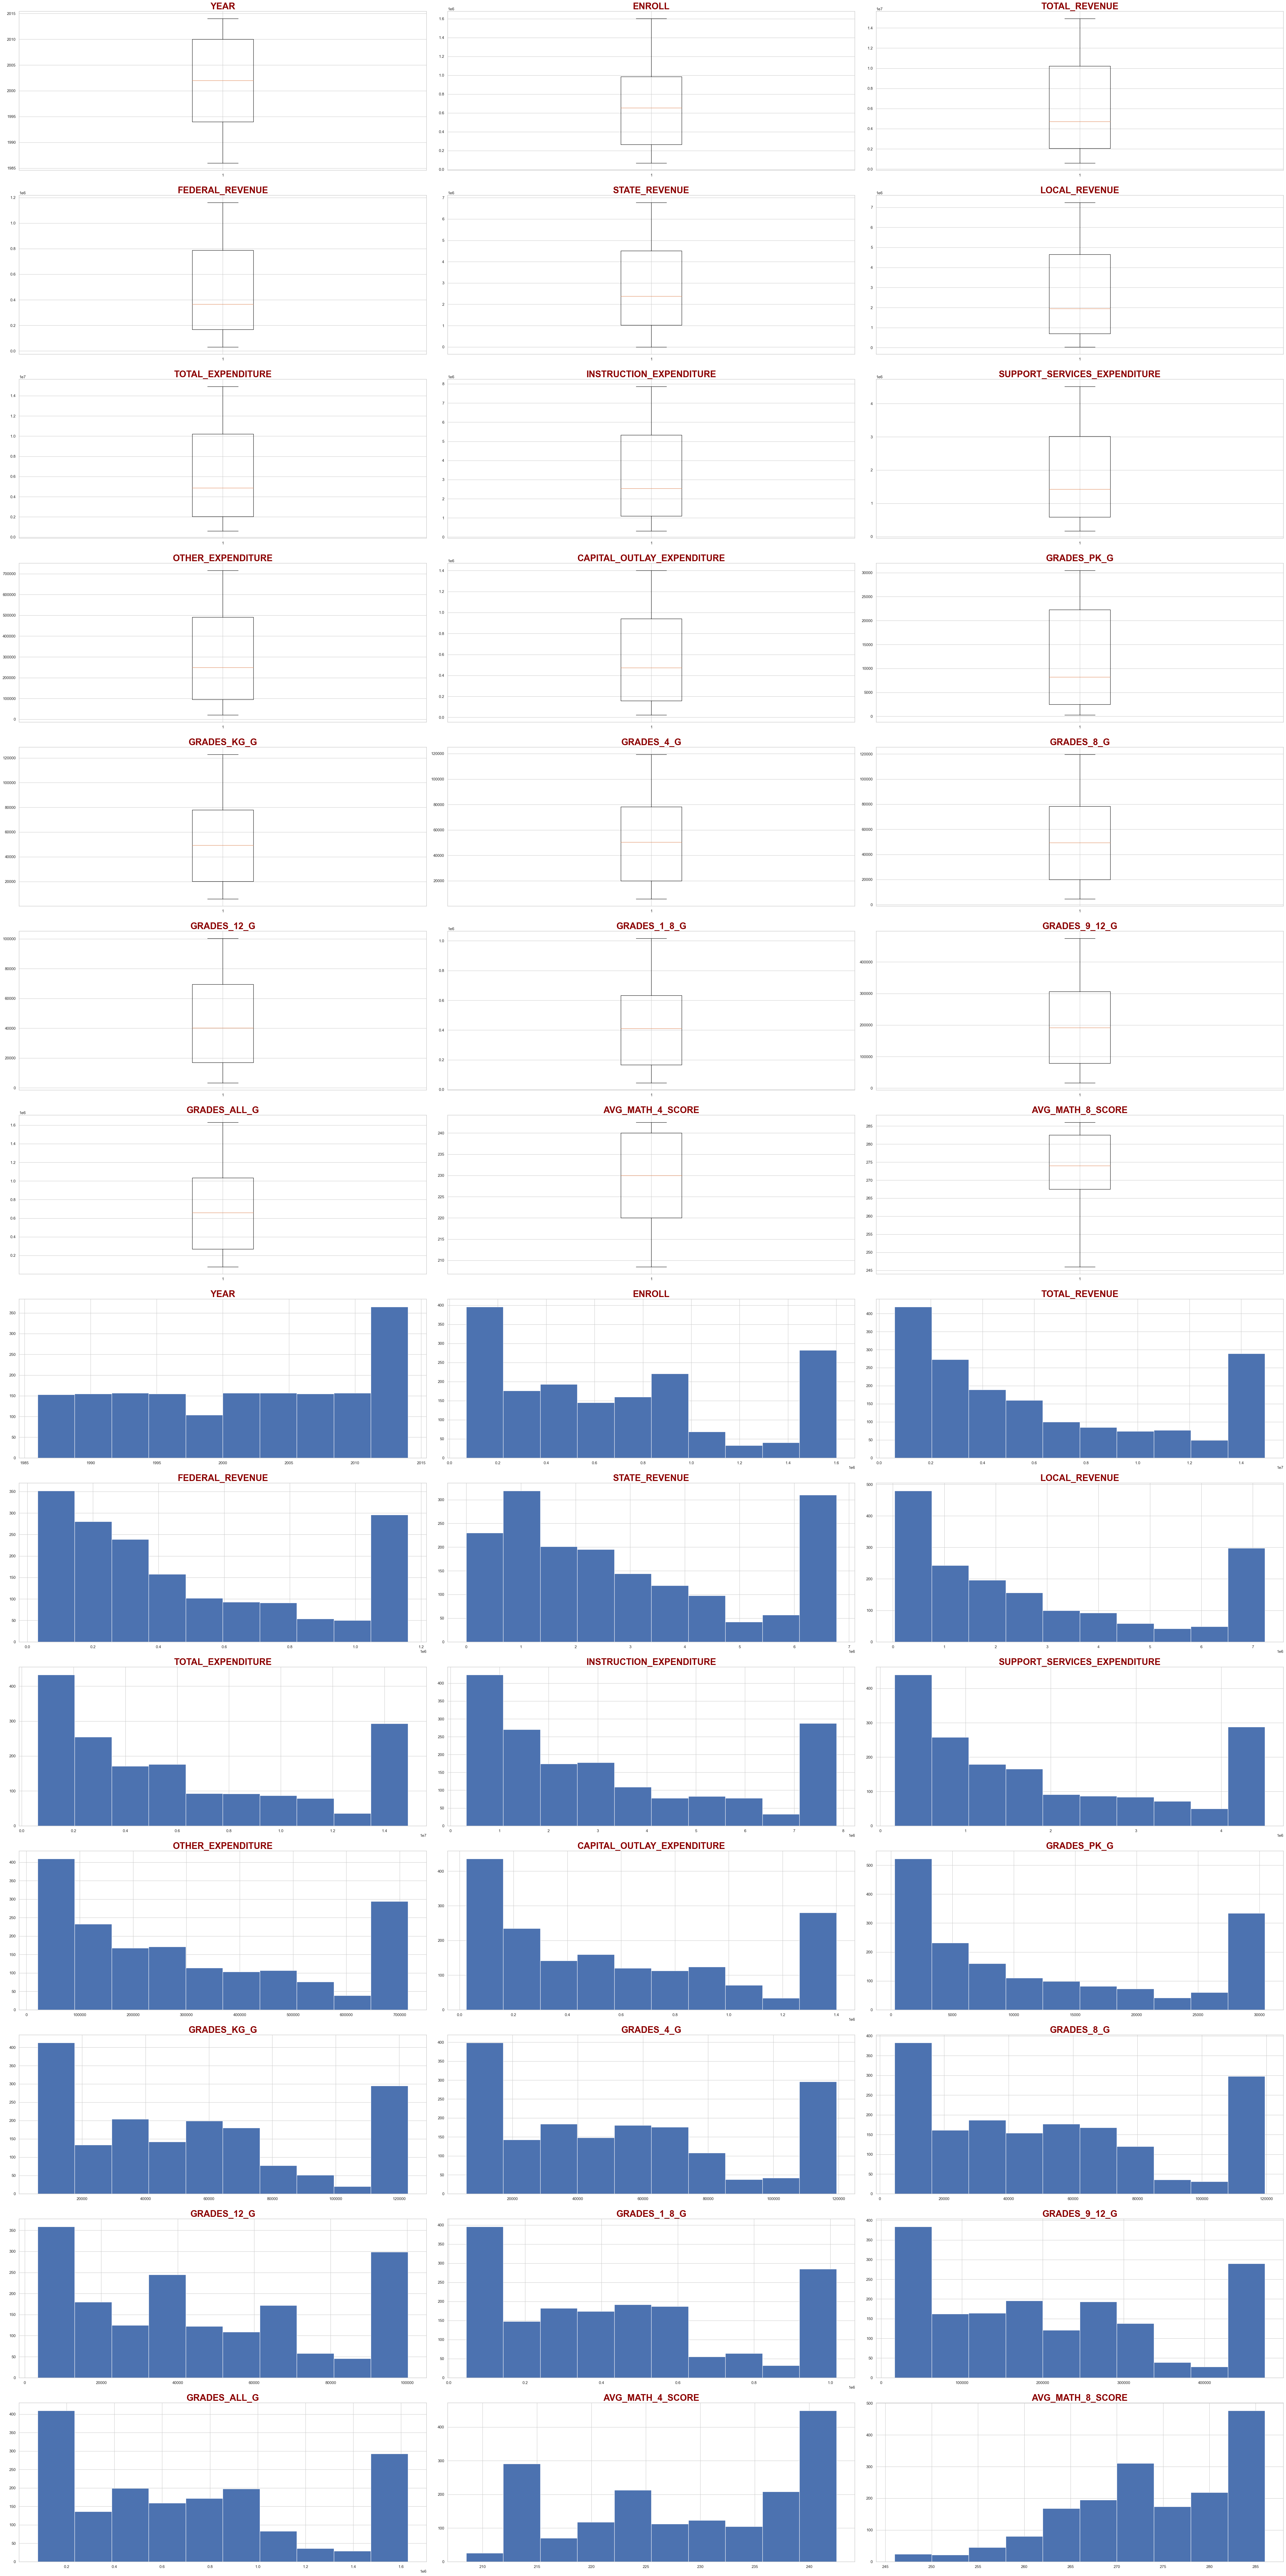

In [8]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (50,100)
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 25}   

for i in range(0,21):
    
    plt.subplot(14,3,i+1)
    plt.boxplot(state1[variables[i]])
    plt.title(variables[i],fontdict=baslik_font)
    plt.tight_layout()

for i in range(0,21):
    plt.subplot(14,3,i+22)
    plt.hist(state1[variables[i]])
    plt.title(variables[i],fontdict=baslik_font)
    plt.tight_layout()

In [9]:
state1.describe(include=["O"])

,PRIMARY_KEY,STATE
count,1715,1715
unique,1715,53
top,1991_INDIANA,FLORIDA
freq,1,33


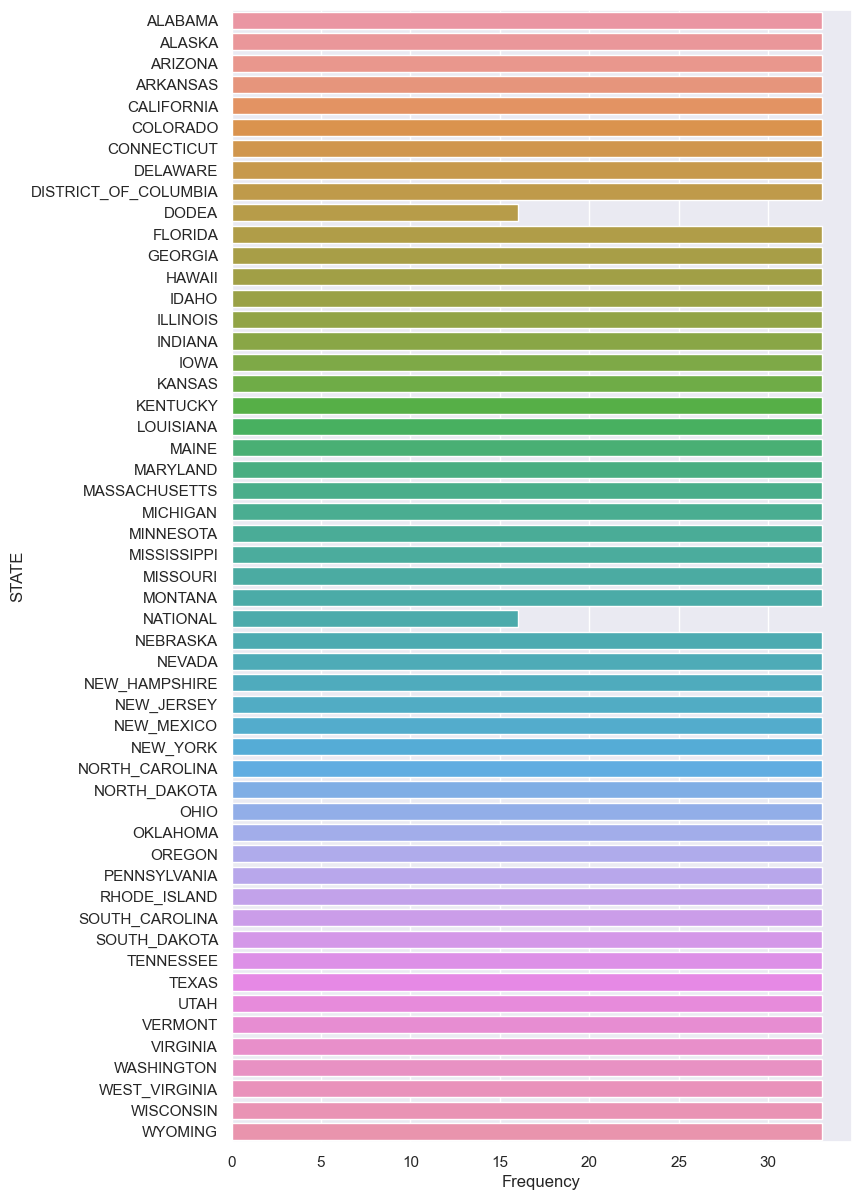

In [60]:
plt.figure(figsize = (8, 15))
sns.barplot(y = state1.groupby("STATE")["STATE"].count().index, 
            x = state1.groupby("STATE")["STATE"].count(), data = state1)
plt.xlabel("Frequency")
plt.show()

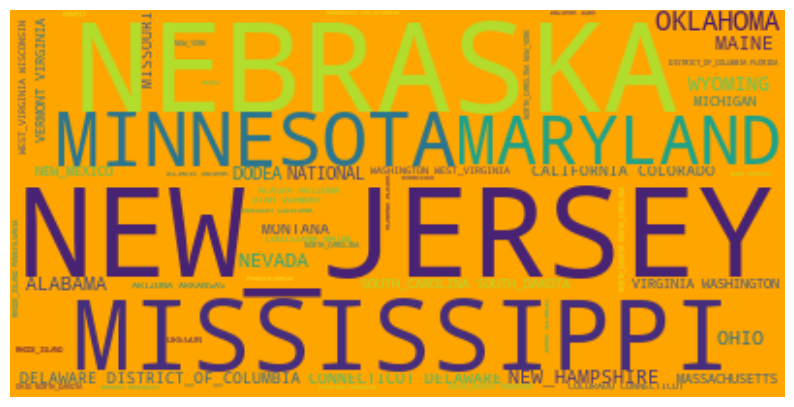

In [14]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="orange").generate(" ".join(state1["STATE"]))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

### 2.Bir eyaleti ele alın (ör: California) ve toplam gelirleri ile toplam harcamalarının yıllara göre değişiminin doğru grafiğini çizin. Bu iki değişken yıllara göre değişim göstermekte midir? Zirve ve dip yaptığı yıllar var mı?

In [15]:
a = state[state["STATE"] == "ALABAMA"]
b = a.groupby("YEAR")["TOTAL_REVENUE"].mean()

d = a.groupby("YEAR")["TOTAL_EXPENDITURE"].mean()

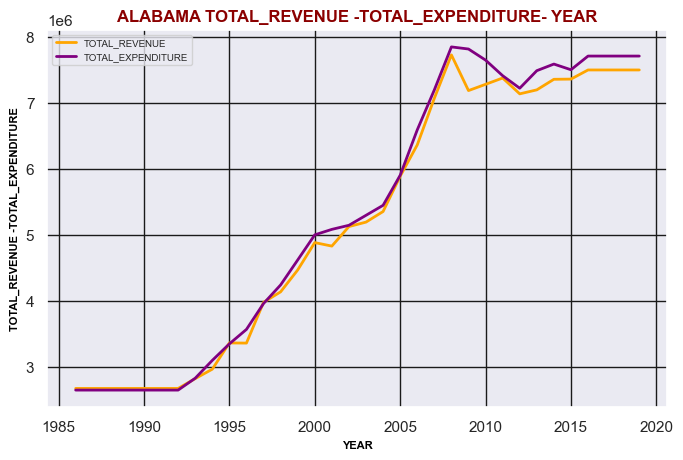

In [51]:
plt.figure(figsize=(8,5), dpi=100)
sns.set(style="darkgrid",font_scale=1)
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 12} 
eksen_font = {'family': 'arial', 'color': 'black','weight': 'bold','size': 8}
plt.plot(b,color="orange",linewidth=2,label="TOTAL_REVENUE")
plt.plot(d,color="purple",linewidth=2,label="TOTAL_EXPENDITURE")
plt.legend(fontsize=7)
plt.xlabel("YEAR",fontdict=eksen_font)
plt.grid(True,color='k')
plt.ylabel("TOTAL_REVENUE -TOTAL_EXPENDITURE",fontdict=eksen_font)
plt.title("ALABAMA TOTAL_REVENUE -TOTAL_EXPENDITURE- YEAR",fontdict = baslik_font)
plt.show()

### 3.Seçtiğiniz eyalette, öğrenciler hangi derste daha başarılı? Matematik mi yoksa okuma mı?

In [17]:
state[state["STATE"] == "ALABAMA"].head()

,Unnamed: 0,index,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,0,1275,1986_ALABAMA,ALABAMA,1986,727716.0,2678885.0,304177.0,1659028.0,715680.0,...,56939.0,57261.0,45396.0,472847.0,208148.0,733735.0,213.0,253.0,207.0,260.0
87,87,1276,1987_ALABAMA,ALABAMA,1987,727716.0,2678885.0,304177.0,1659028.0,715680.0,...,56671.0,56472.0,45742.0,472847.0,208148.0,729234.0,213.0,253.0,207.0,260.0
139,139,1277,1988_ALABAMA,ALABAMA,1988,727716.0,2678885.0,304177.0,1659028.0,715680.0,...,57531.0,55262.0,45571.0,472847.0,208148.0,724751.0,213.0,253.0,207.0,260.0
192,192,1278,1989_ALABAMA,ALABAMA,1989,727716.0,2678885.0,304177.0,1659028.0,715680.0,...,59944.0,54912.0,43482.0,472847.0,208148.0,723743.0,213.0,253.0,207.0,260.0
224,224,1279,1990_ALABAMA,ALABAMA,1990,727716.0,2678885.0,304177.0,1659028.0,715680.0,...,58666.0,57024.0,42031.0,472847.0,208148.0,721806.0,213.0,253.0,207.0,260.0


In [19]:
x=a.groupby("YEAR")["AVG_MATH_4_SCORE"].mean()

In [20]:
y=a.groupby("YEAR")["AVG_READING_4_SCORE"].mean()


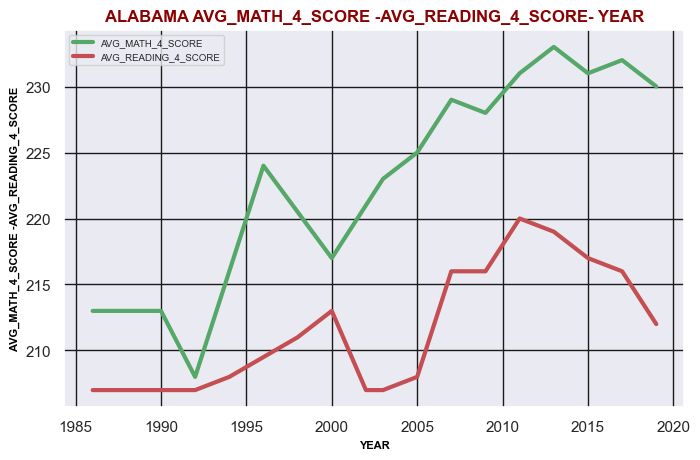

In [52]:
plt.figure(figsize=(8,5), dpi=100)
sns.set(style="darkgrid",font_scale=1)
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 12} 
eksen_font = {'family': 'arial', 'color': 'black','weight': 'bold','size': 8}
plt.plot(x,color="g",linewidth=3,label="AVG_MATH_4_SCORE")
plt.plot(y,color="r",linewidth=3,label="AVG_READING_4_SCORE")
plt.legend(fontsize=7)
plt.grid(True,color='k')
plt.xlabel("YEAR",fontdict=eksen_font)
plt.ylabel("AVG_MATH_4_SCORE -AVG_READING_4_SCORE",fontdict=eksen_font)
plt.title("ALABAMA AVG_MATH_4_SCORE -AVG_READING_4_SCORE- YEAR",fontdict = baslik_font)
plt.show()

In [22]:
z=a.groupby("YEAR")["AVG_MATH_8_SCORE"].mean()


In [23]:
t=a.groupby("YEAR")["AVG_READING_8_SCORE"].mean()


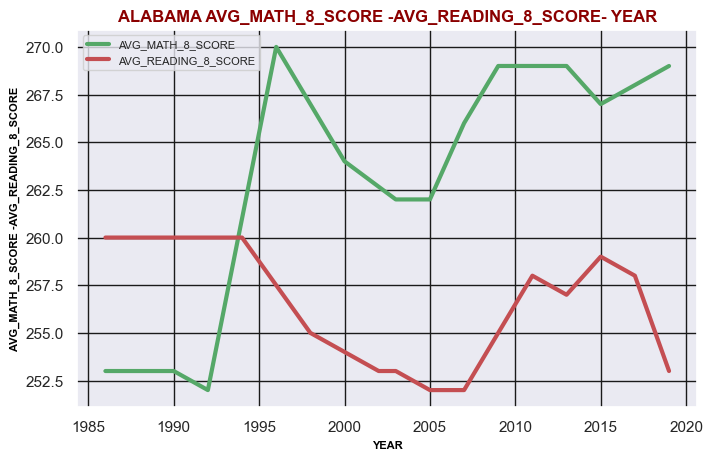

In [53]:
plt.figure(figsize=(8,5), dpi=100)
sns.set(style="darkgrid",font_scale=1)
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 12} 
eksen_font = {'family': 'arial', 'color': 'black','weight': 'bold','size': 8}
plt.plot(z,color="g",linewidth=3,label="AVG_MATH_8_SCORE")
plt.plot(t,color="r",linewidth=3,label="AVG_READING_8_SCORE")
plt.legend(fontsize=8)
plt.grid(True,color='k')
plt.xlabel("YEAR",fontdict=eksen_font)
plt.ylabel("AVG_MATH_8_SCORE -AVG_READING_8_SCORE",fontdict=eksen_font)
plt.title("ALABAMA AVG_MATH_8_SCORE -AVG_READING_8_SCORE- YEAR",fontdict = baslik_font)
plt.show()

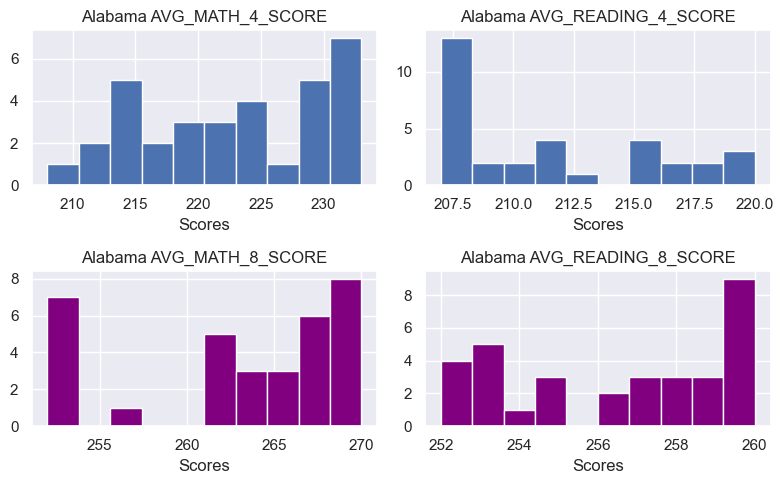

In [25]:
plt.figure(figsize=(8,5),dpi=100)
degisken = ["AVG_MATH_4_SCORE","AVG_READING_4_SCORE"]
degisken1= ["AVG_MATH_8_SCORE","AVG_READING_8_SCORE"]
for i in range(0,2):
    plt.subplot(2,2,i+1)
    plt.hist(a[degisken[i]])
    plt.title("Alabama "+degisken[i])
    plt.xlabel("Scores")
    
for i in range(0,2):
    plt.subplot(2,2,i+3)
    plt.hist(a[degisken1[i]],color="purple")
    plt.title("Alabama "+degisken1[i])
    plt.xlabel("Scores")
    plt.tight_layout()
    

### 5.Metematik ve okuma notlarında birçok eksik değer olduğunu farketmişsinizdir. Eksik değerleri ortalama, medyan ve enterpolasyon ile tamamlayın. Bu tekniklerin notların dağılımı üzerindeki etkisini karşılaştırın.

In [26]:
original_state = pd.read_csv("states_all.csv")     #eksik degerleri ortalama, medyan ve enterpolasyon
                                                   #ile doldurmak için ilgili ham veriyi tekrar yükledik
original_state.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [27]:
st = original_state[["YEAR","STATE","AVG_MATH_4_SCORE","AVG_MATH_8_SCORE","AVG_READING_4_SCORE","AVG_READING_8_SCORE"]]

In [28]:
st.isnull().sum()

YEAR                      0
STATE                     0
AVG_MATH_4_SCORE       1150
AVG_MATH_8_SCORE       1113
AVG_READING_4_SCORE    1065
AVG_READING_8_SCORE    1153
dtype: int64

In [29]:
for sutun in st.columns[2:,]:                           #ham verideki reading ve math score degişkenleri ortalama ile dolduruldu.
                                                              
    st[sutun].fillna(st[sutun].mean(),inplace=True)

In [30]:
st.isnull().sum()

YEAR                   0
STATE                  0
AVG_MATH_4_SCORE       0
AVG_MATH_8_SCORE       0
AVG_READING_4_SCORE    0
AVG_READING_8_SCORE    0
dtype: int64

In [31]:
st1 = original_state[["YEAR","STATE","AVG_MATH_4_SCORE","AVG_MATH_8_SCORE","AVG_READING_4_SCORE","AVG_READING_8_SCORE"]]

In [32]:
yil_ort=st1.groupby("YEAR").mean()         # yıllara göre gruplayıp ortalamayla dolduralım

In [33]:
for sutun in st1.columns[2:,]:
    
    for i in st1["YEAR"].unique():
        
        st1[sutun][(st1["YEAR"]==i) & (st1[sutun].isnull())] = yil_ort[sutun][i]

In [34]:
st1.isnull().sum()

YEAR                      0
STATE                     0
AVG_MATH_4_SCORE       1026
AVG_MATH_8_SCORE       1026
AVG_READING_4_SCORE     973
AVG_READING_8_SCORE    1026
dtype: int64

In [35]:
for sutun in st1.columns[2:,]:                  # yıllara göre gruplayıp ortalamayla doldurduktan sonra eksik kalan veriler 
                                                #ortalamayla dolduruldu.              
    st1[sutun].fillna(st1[sutun].mean(),inplace=True)

In [36]:
st1.isnull().sum()

YEAR                   0
STATE                  0
AVG_MATH_4_SCORE       0
AVG_MATH_8_SCORE       0
AVG_READING_4_SCORE    0
AVG_READING_8_SCORE    0
dtype: int64

In [37]:
st2 = original_state[["YEAR","STATE","AVG_MATH_4_SCORE","AVG_MATH_8_SCORE","AVG_READING_4_SCORE","AVG_READING_8_SCORE"]]

In [38]:
for sutun in st2.columns[2:,]:                  # simdi de eksik veriler std ile dolduruldu.              
    st2[sutun].fillna(st2[sutun].std(),inplace=True)

In [39]:
st2.isnull().sum()

YEAR                   0
STATE                  0
AVG_MATH_4_SCORE       0
AVG_MATH_8_SCORE       0
AVG_READING_4_SCORE    0
AVG_READING_8_SCORE    0
dtype: int64

In [40]:
st3 = original_state[["YEAR","STATE","AVG_MATH_4_SCORE","AVG_MATH_8_SCORE","AVG_READING_4_SCORE","AVG_READING_8_SCORE"]]

In [41]:
for eyalet in st3["STATE"].unique():           # son olarak da enterpolasyon işlemi yaparak doldurduk.
    st3[st3["STATE"] == eyalet] = st3[st3["STATE"] == eyalet].interpolate(limit_direction = "both")
         

In [42]:
st3.isnull().sum()

YEAR                   0
STATE                  0
AVG_MATH_4_SCORE       0
AVG_MATH_8_SCORE       0
AVG_READING_4_SCORE    0
AVG_READING_8_SCORE    0
dtype: int64

In [248]:
#simdi de doldurma şekillerine göre dağılımlarını inceleyelim.

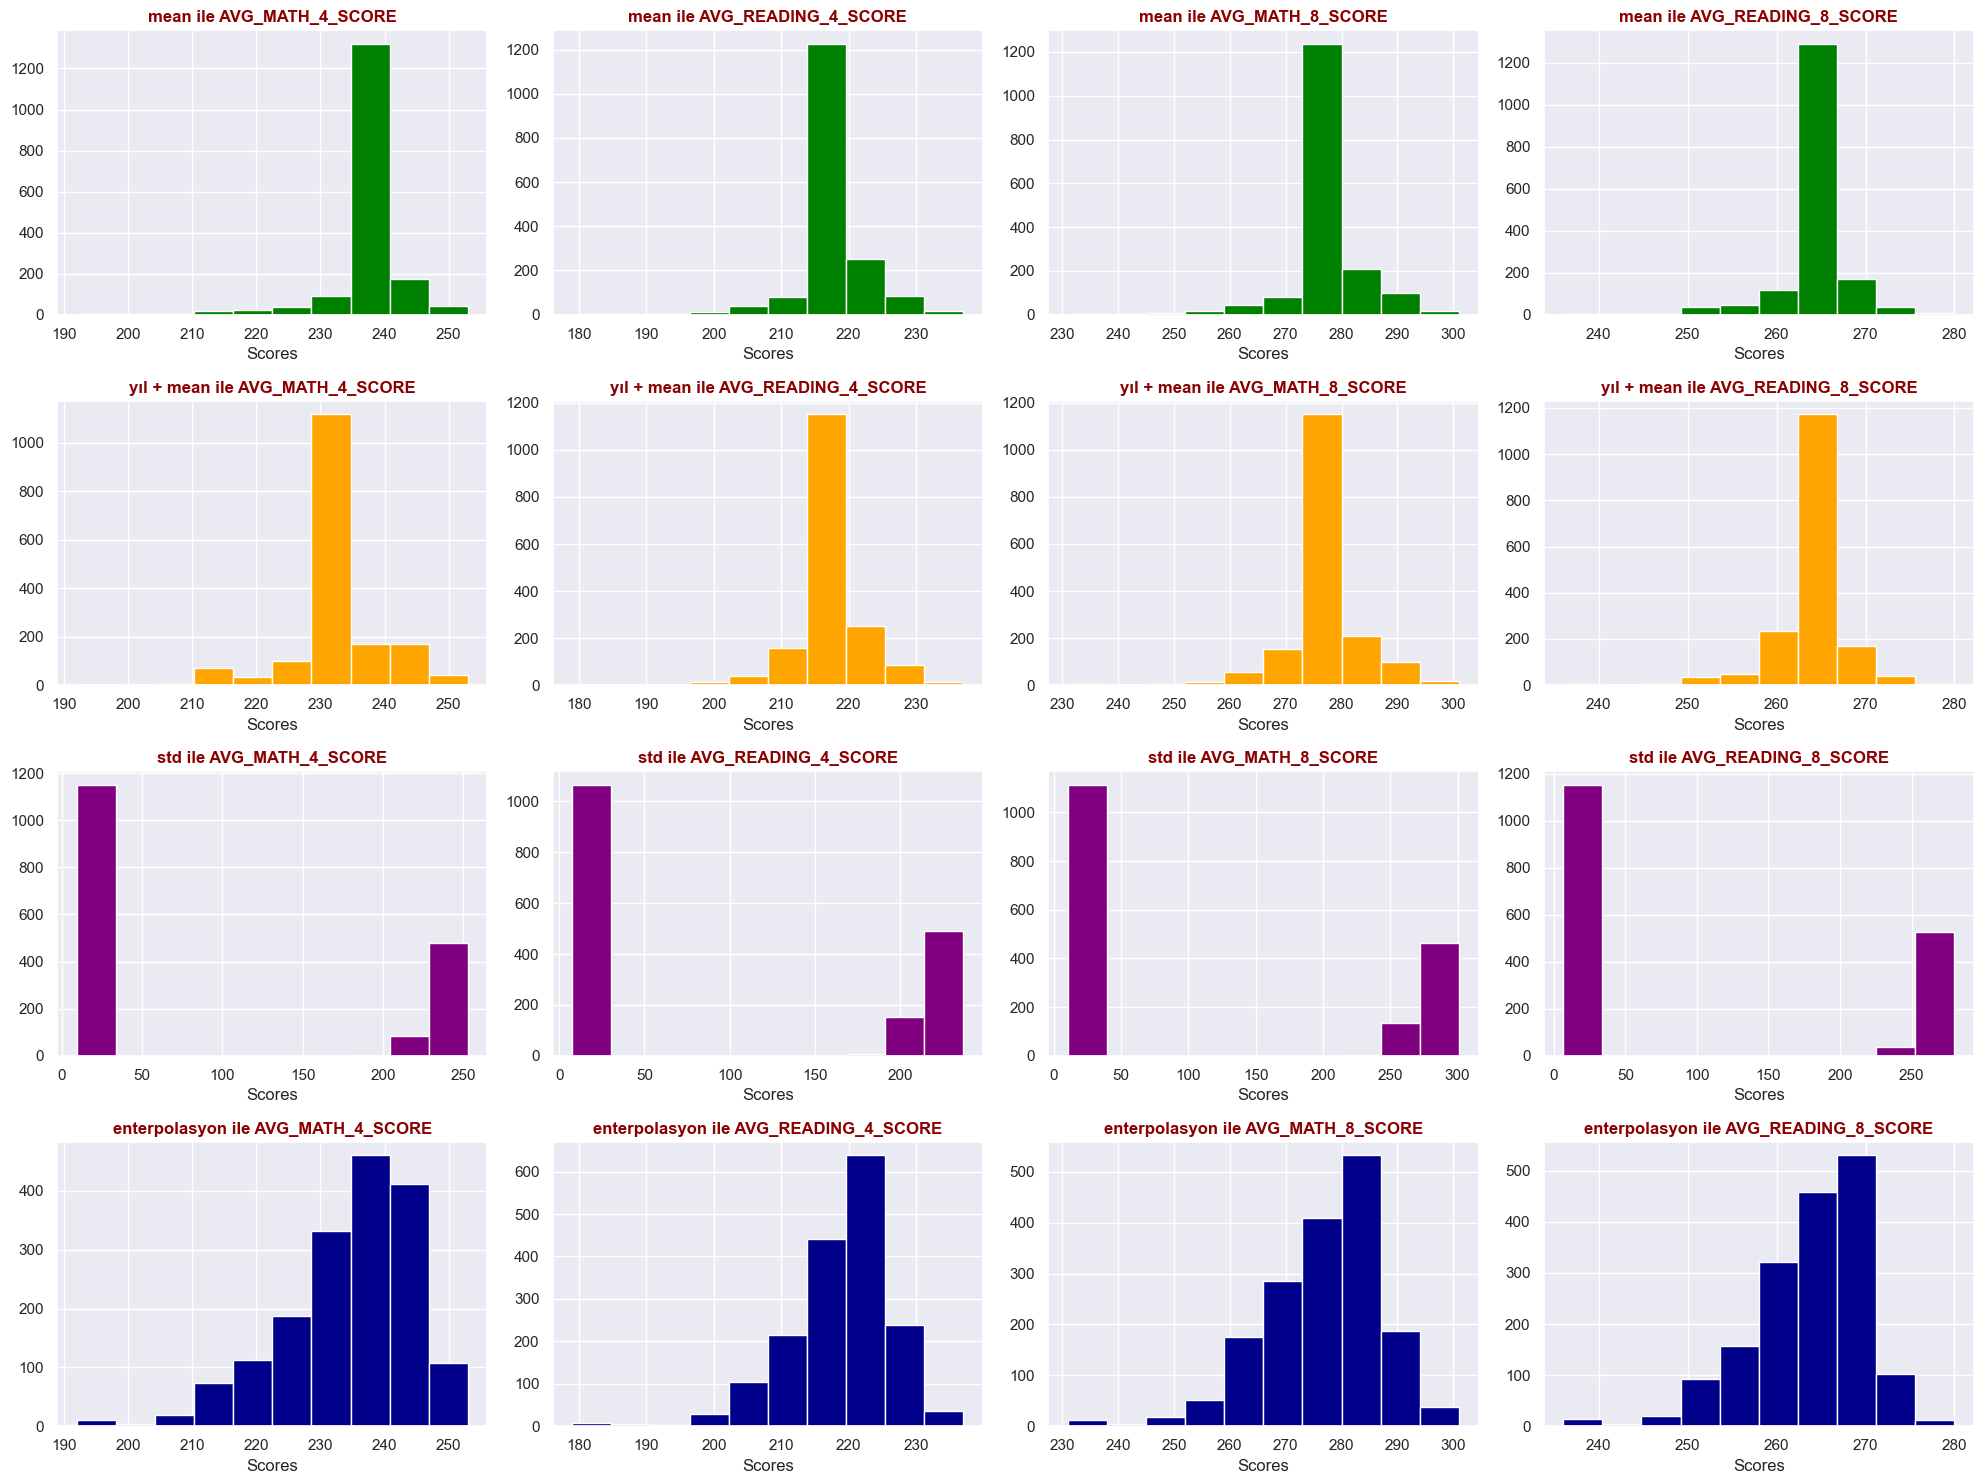

In [43]:
plt.figure(figsize=(20,15),dpi=100)
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 12}
degisken = ["AVG_MATH_4_SCORE","AVG_READING_4_SCORE","AVG_MATH_8_SCORE","AVG_READING_8_SCORE"]

for i in range(0,4):
    plt.subplot(4,4,i+1)
    plt.hist(st[degisken[i]],color = "green")
    plt.title("mean ile "+ degisken[i],fontdict=baslik_font)
    plt.xlabel("Scores")
    
for i in range(0,4):
    plt.subplot(4,4,i+5)
    plt.hist(st1[degisken[i]],color="orange")
    plt.title("yıl + mean ile "+ degisken[i],fontdict=baslik_font)
    plt.xlabel("Scores")

for i in range(0,4):
    plt.subplot(4,4,i+9)
    plt.hist(st2[degisken[i]],color="purple")
    plt.title("std ile " + degisken[i],fontdict=baslik_font)
    plt.xlabel("Scores")
    
for i in range(0,4):
    plt.subplot(4,4,i+13)
    plt.hist(st3[degisken[i]],color="darkblue")
    plt.title("enterpolasyon ile "+ degisken[i],fontdict=baslik_font)
    plt.xlabel("Scores")
    plt.tight_layout()